# Nima Aghli 
## PA4 
### POD Paper Implementation

In [546]:
%matplotlib inline
#from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg
from pylab import *
import pandas as pd
from scipy import misc
import scipy.fftpack as fftim
from scipy.misc.pilutil import Image
from PIL import Image
import cmath
from joblib import Parallel, delayed
import scipy.io as sio
from pims import ImageSequence
from skimage.segmentation import slic
from skimage.color import rgb2lab
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1-loading Frames Into Program

images = ImageSequence('images//frame00*.jpg')

## 2-Object Prposal Generation 
### After running Alexi et al's Algorithm in Matlab and storing data in Mat file we first read the Mat file into python and redraw 20 proposal for each frame as described in paper.  

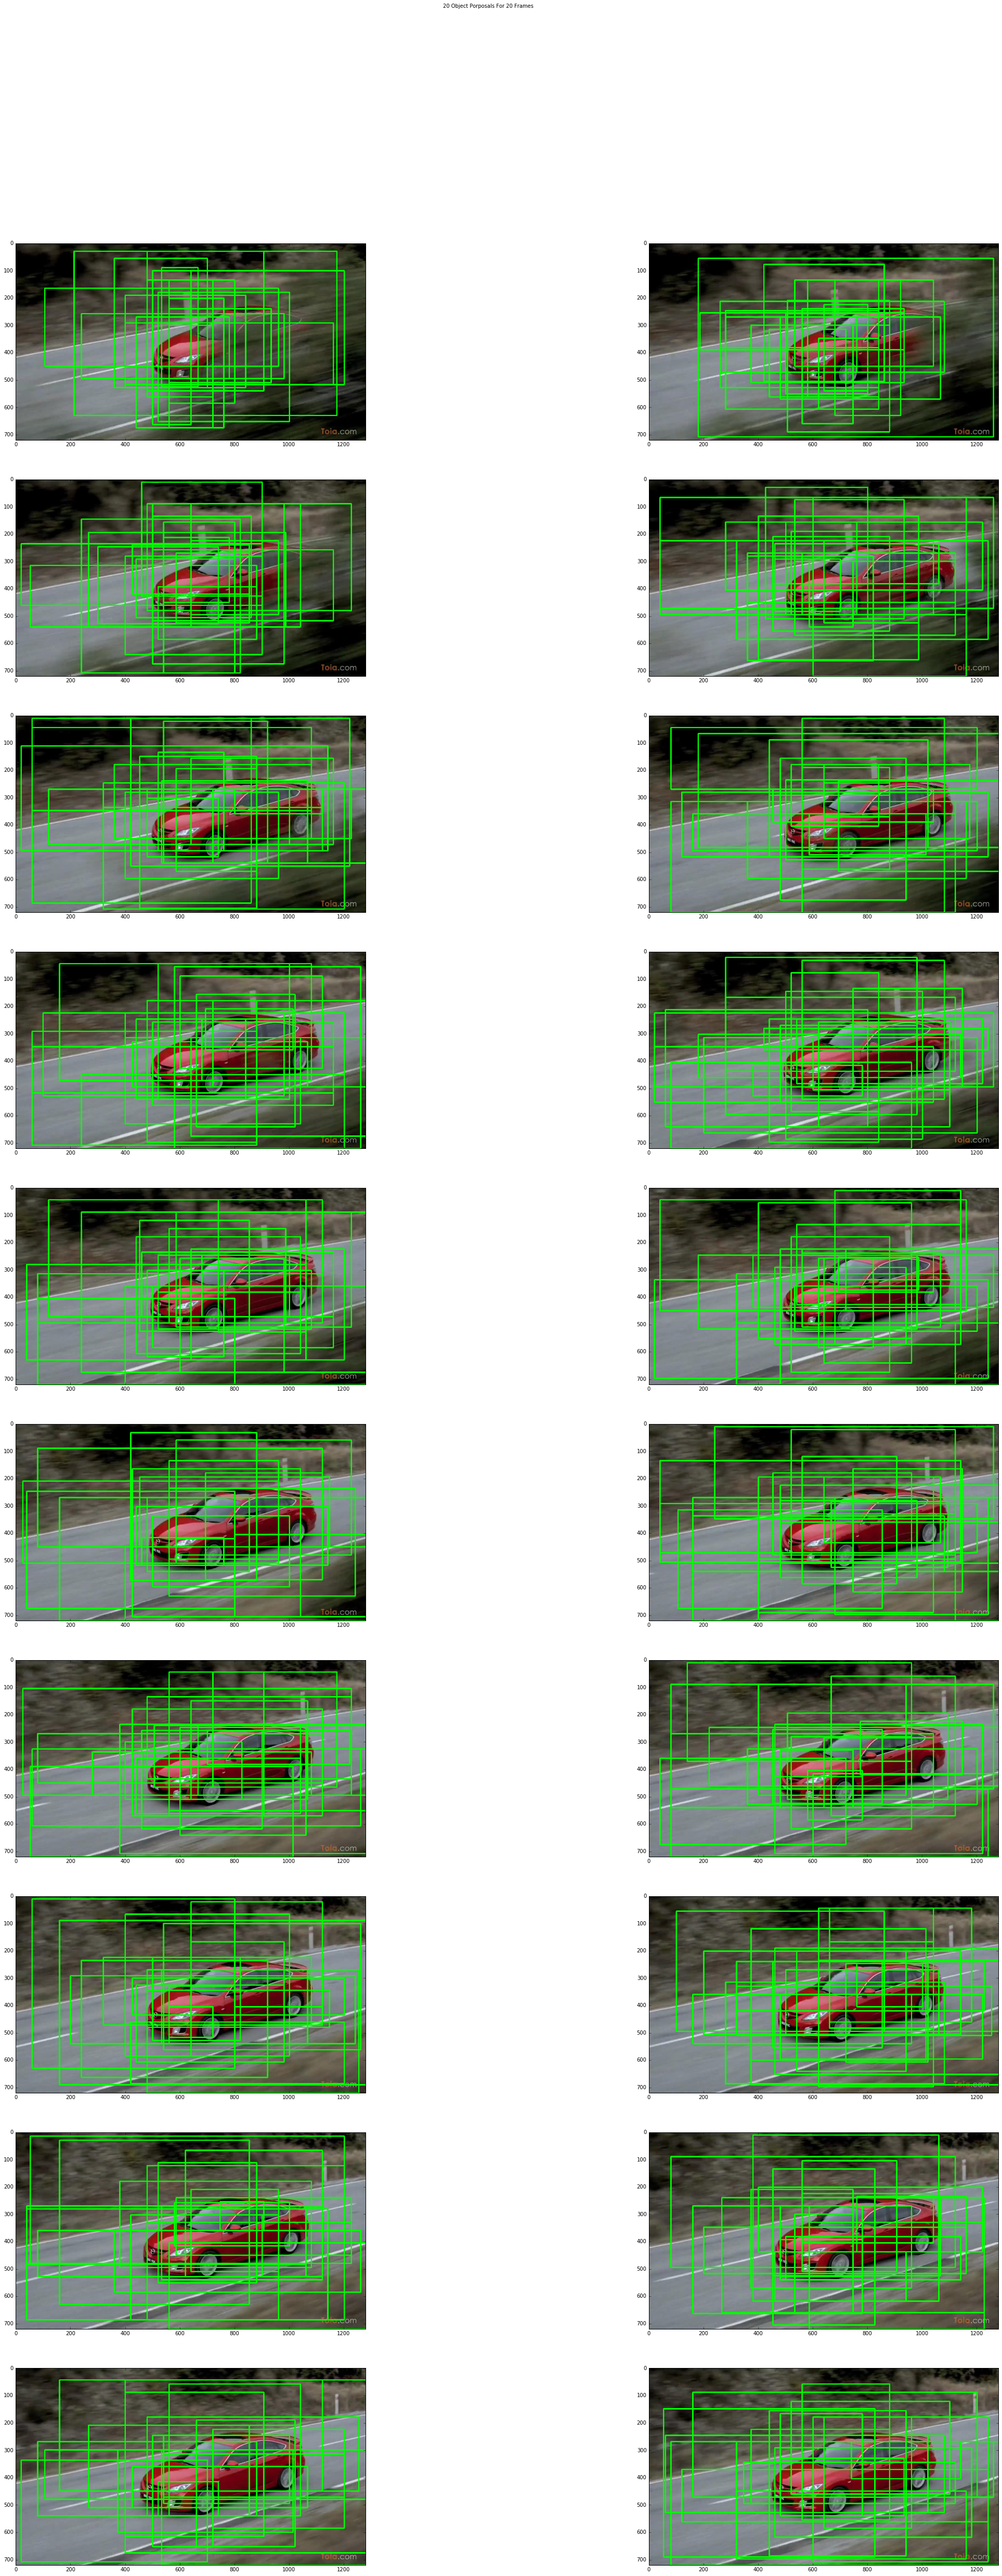

In [640]:
mat_contents = sio.loadmat('proposals.mat')
oct_a = mat_contents['proposals']
img = misc.imread("images//frame0001.jpg")
img=images[0]
prop=oct_a[:,:,:].astype(np.int64)
fig = plt.figure(figsize=(40, 80))
fig.suptitle('20 Object Porposals For 20 Frames')
for k in range(0,20):
    img=images[k]
    for i in range(0,19):
        x1=prop[i,0,k]
        y1=prop[i,1,k]
        x2=prop[i,2,k]
        y2=prop[i,3,k]
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),3)
       
    ax = fig.add_subplot(10, 2, k+1)
    ax.imshow(img)




## 3-Extracting Background And Foreground Using Grabcut Algorithm 
### After running Alexi et al's Algorithm in Matlab and storing data in Mat file we first read the Mat file into python and redraw 20 proposal for each frame as described in paper. After string all images and their proposal in dataset we can use Grabcut algorithm to extract background and foreground based on rectangles extracted from step 2.For demonstration  purposes we used first and 9th proposal for first image as input for Grabcut algorithm.

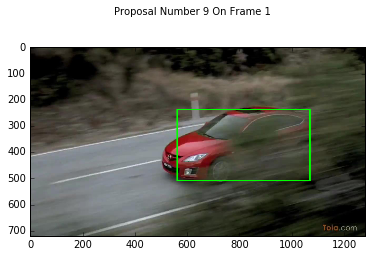

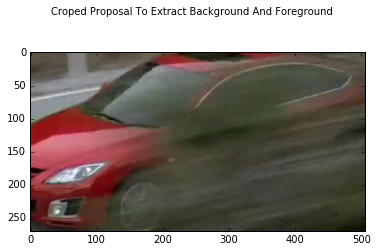

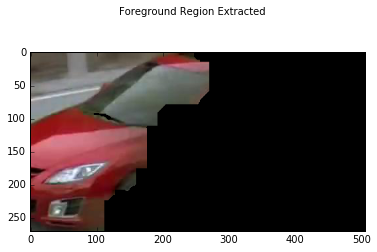

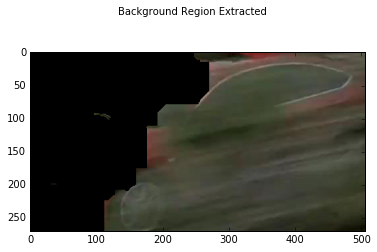

(<matplotlib.image.AxesImage at 0x13bc2a7f0>, None)

In [639]:
img=images[0]
M = np.size(img, 0)#generate height and 
N = np.size(img, 1)#width to loop over them 
img2=images[0]
x1=prop[0,0,9]
y1=prop[0,1,9]
x2=prop[0,2,9]
y2=prop[0,3,9]

img=img[y1:y2-M,x1:x2-N]
cv2.rectangle(img2,(x1,y1),(x2,y2),(0,255,0),3)
fig = plt.figure()
fig.suptitle('Proposal Number 9 On Frame 1')
plt.imshow(img2),plt.show()
fig = plt.figure()
fig.suptitle('Croped Proposal To Extract Background And Foreground')
plt.imshow(img),plt.show()

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
M = np.size(img, 0)#generate height and 
N = np.size(img, 1)#width to loop over them 
rect = (0,0,M,N)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
forground = img*mask2[:,:,np.newaxis]
background=img-forground
fig = plt.figure()
fig.suptitle('Foreground Region Extracted')
plt.imshow(forground),plt.show()
fig = plt.figure()
fig.suptitle('Background Region Extracted')
plt.imshow(background),plt.show()

## 4-Generating Superpixels 
### In this step we use SLIC algorithm to generate 1000 super pixels for each frame:

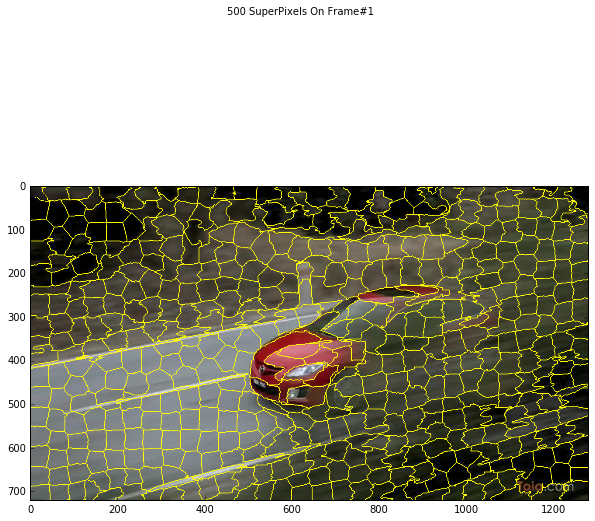

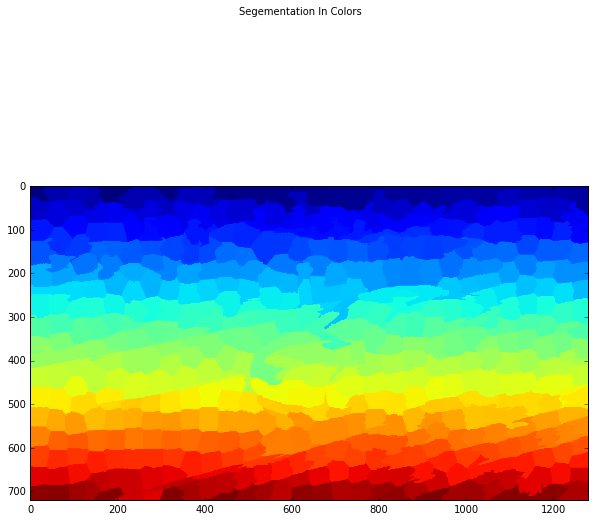

(<matplotlib.image.AxesImage at 0x136830da0>, None)

In [636]:
image = img_as_float(images[0])
segments = slic(image, 500,convert2lab=1,)
#np.savetxt('test.out', segments[1].astype(np.int64), delimiter=',')   # X is an array
#print(np.size(segments,0))#hight
#print(np.size(segments,1))#wi
fig = plt.figure(figsize=(10,10))
fig.suptitle('500 SuperPixels On Frame#1')
plt.imshow(mark_boundaries(image, segments)),plt.show()
fig = plt.figure(figsize=(10,10))
fig.suptitle('Segementation In Colors')
plt.imshow(segments),plt.show()
#print(color.rgb2lab(images[0])[0,0][2])
#print(segments[719,1279])


## 5-Averaging LAB Colors 
### After generating super pixels we convert each pixel value in each super pixel area from RGB to LAB colorspace and then average all L,A,B values to achieve a unique LAB value for each super pixel:

In [603]:
img=images[0]
labimage=color.rgb2lab(images[0])
size=len(np.unique(segments))
segs=np.unique(segments)
print(np.shape(segs))
avgs=np.zeros((size, 3), dtype = "float64")
for (i, segVal) in enumerate(np.unique(segments)):
    img=images[0]
    img[segments != segVal] = (0, 0, 0)
    #L=np.average(color.rgb2lab(img)[np.nonzero(img[:,:,0])])
    #A=np.average(color.rgb2lab(img)[np.nonzero(img[:,:,1])])
    #B=np.average(color.rgb2lab(img)[np.nonzero(img[:,:,2])])
    L=np.average(color.rgb2lab(img)[:,:,0])
    A=np.average(color.rgb2lab(img)[:,:,1])
    B=np.average(color.rgb2lab(img)[:,:,2])
    #print(type(L))
    avgs[i]=[L,A,B]
    #print(L,A,B)

#plt.imshow(img),plt.show()
#print(avgs)
#print((LL))

  


(473,)


## 6-Calculate 100 codeword from superpixels
### Kmeans clustring is used in order to extract 100 code words from 1000 superpixels.
### kml holds the the labels for codewords and kmc store the center node for each cluster:

In [608]:
km = KMeans(n_clusters=100).fit(avgs)
kml=km.labels_
kmc=km.cluster_centers_ 
#print(kml)


## 7-Plot clustering results for virtualization 
### Each color group indicates a cluster and cubes expressing center of clusters.

TypeError: imshow() missing 1 required positional argument: 'X'

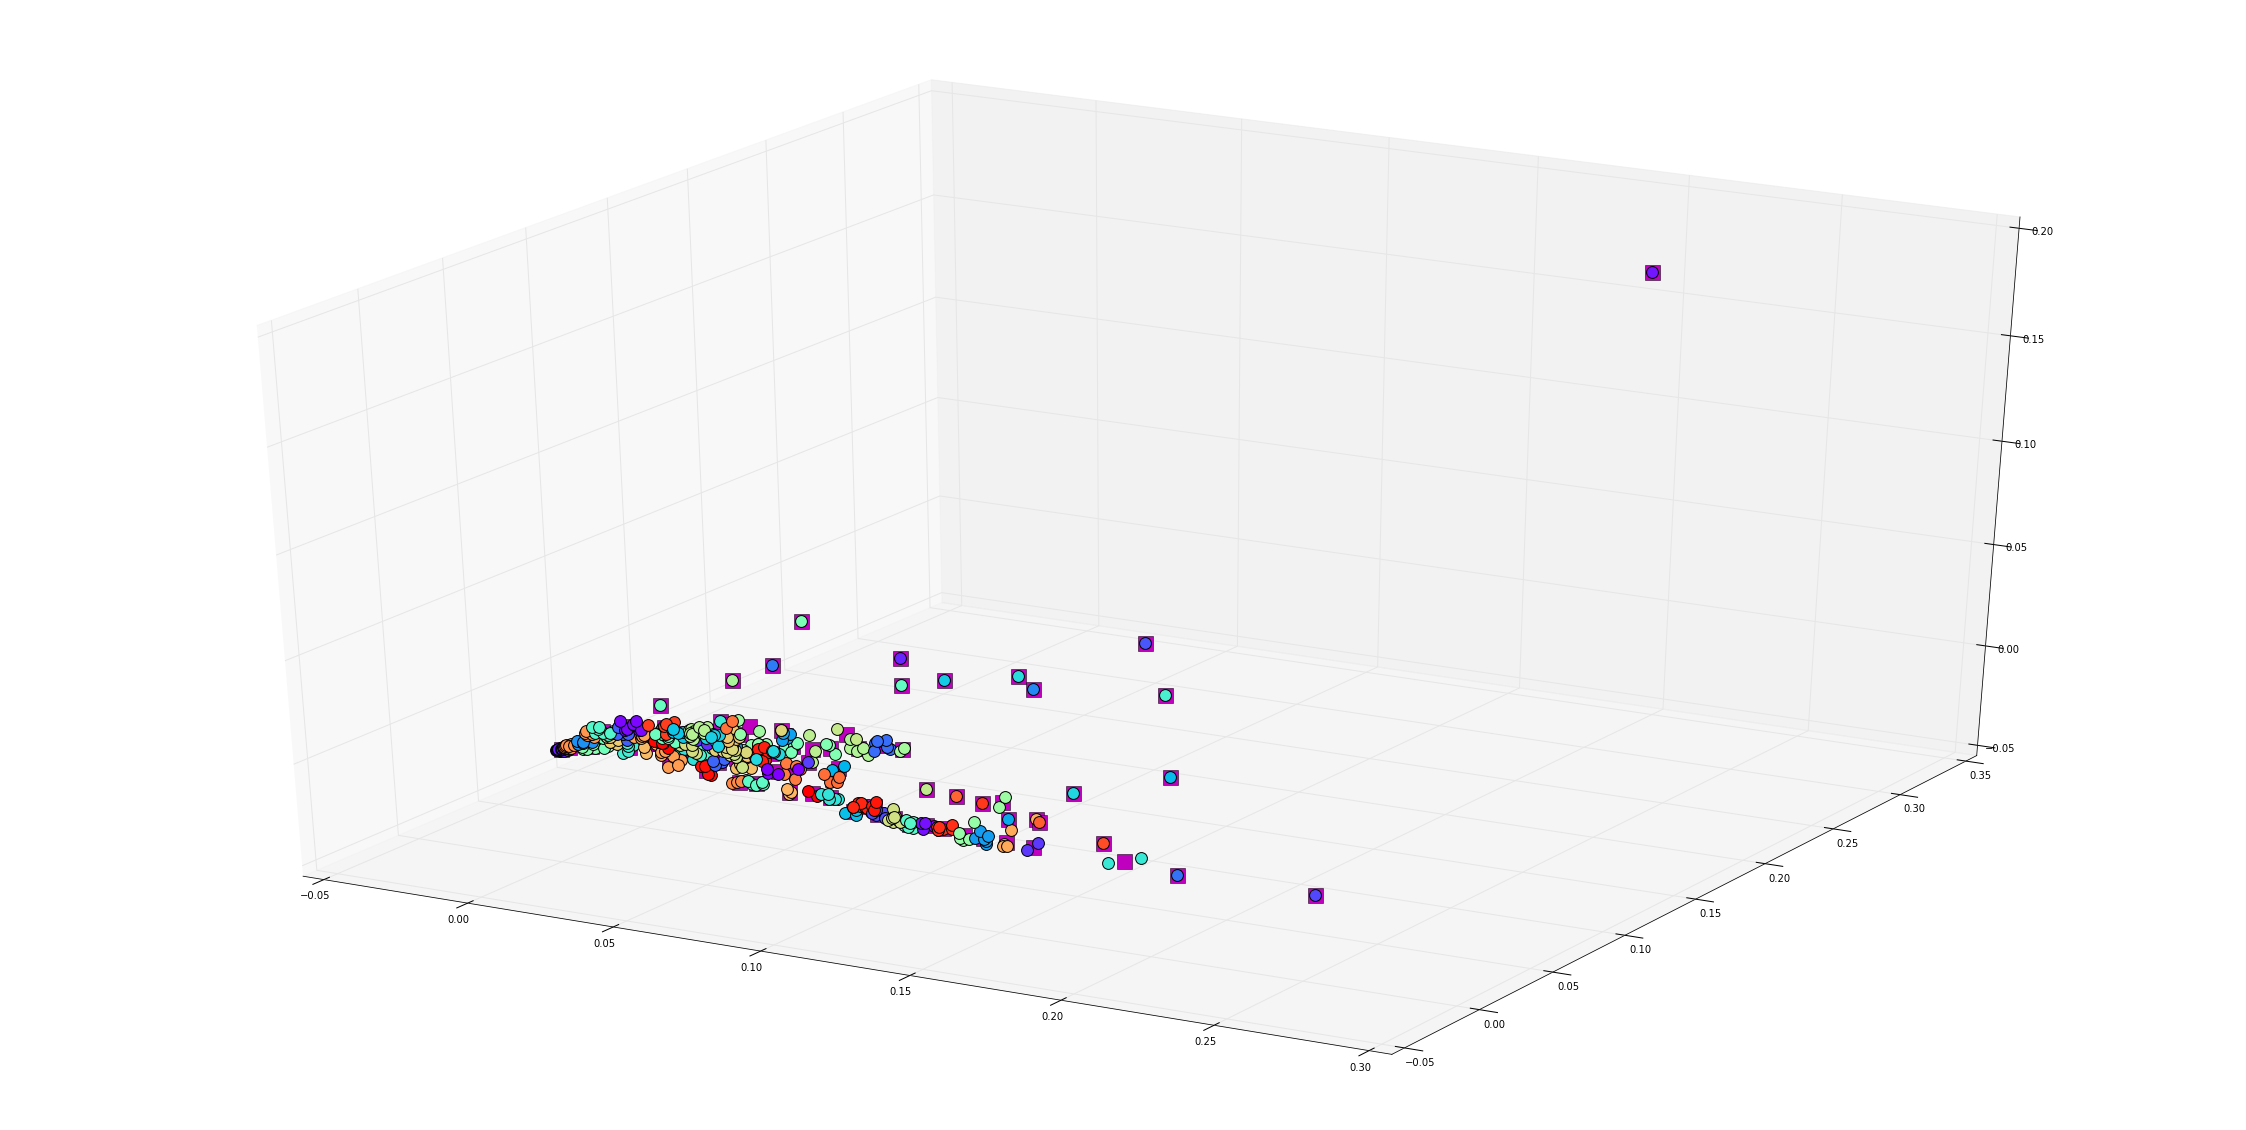

In [625]:
fig = plt.figure(figsize=(40,20))
ax = fig.gca(projection='3d')
x = np.arange(10)
ys = [i+x+(i*x)**2 for i in range(100)]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
#print(colors)
#colors = ('r', 'g', 'b', 'k')
for i in range(0,np.size(kml)):
    ax.scatter(avgs[i,0],avgs[i,1], avgs[i,2],c=colors[kml[i]],s=140)
    #ax.legend()
    #print(avgs[i,0],avgs[i,1],avgs[i,2])
#=ax.set_xlim3d(0, 7)
#ax.set_ylim3d(-2, 2)
#ax.set_zlim3d(0, 1)
plot(kmc[:,0],kmc[:,1],kmc[:,2],'sm',markersize=15)
plt.imshow(interpolation='nearest',aspect='auto',origin='lower', extent=[0,1,0,1])


## 8-Record the histogram of codewords for foreground regions.
### we have extracted foreground region perviously and saved it in foreground matrix.In this step we go over each pixel in foreground and find its codeword in cluster and save it in array in order to draw histogram 

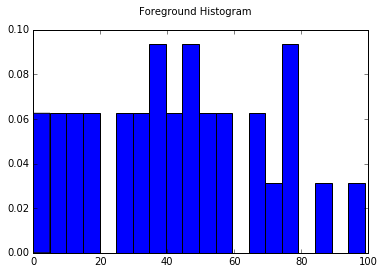

In [624]:
#print(kml[segments[100,100]]) # example to find code word of special x,y 
#print(x1,y1,x2,y2)
foreHist=np.zeros(100)
M = np.size(forground, 0)#generate height and 
N = np.size(forground, 1)#width to loop over them 
#print(M,N)
#print(np.shape(segments))
for k in range(0,M):
    for l in range(0,N):
        #print(forground[k,l])
        if(np.all(forground[k,l]!=0)):
        #print(k+x1,l+y1)
            value=(kml[segments[k+y1,l+x1]])
            foreHist[value]=foreHist[index]+1
#print(foreHist)  
norm = [float(i)/sum(foreHist) for i in foreHist]
fig = plt.figure()
fig.suptitle('Foreground Histogram')
plt.hist(range(0, 100), weights=norm[:],bins=20)
plt.show()

## 9-Record the histogram of codewords for background regions

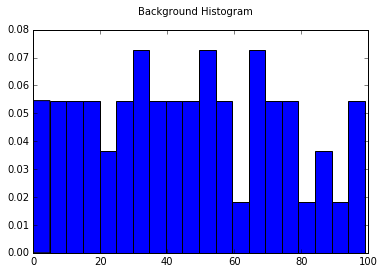

In [621]:
backHist=np.zeros(100)
M = np.size(background, 0)#generate height and 
N = np.size(background, 1)#width to loop over them 
for k in range(0,M):
    for l in range(0,N):
        #print(forground[k,l])
        if(np.all(background[k,l]!=0)):
        #print(k+x1,l+y1)
            value=(kml[segments[k+y1,l+x1]])
            foreHist[value]=foreHist[index]+1
#print(foreHist)  
norm = [float(i)/sum(foreHist) for i in foreHist]
fig = plt.figure()
fig.suptitle('Background Histogram')
plt.hist(range(0, 100), weights=norm[:],bins=20)
plt.show()